In [1]:
# Load modules for data accessing and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load NLP modules
import re
import sys
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams

In [3]:
# construct dataframe for train...
df_train = pd.read_csv('../../data/dataset/csv/review.csv', index_col = 'review_id')

In [4]:
#####################
## Preprocess data ##
#####################
#token_pattern = "[a-zA-Z'`]+"
token_pattern = "[a-zA-Z0-9'`]+"
#print(stopwords.words('english'))
#token_pattern = r"(?u)\b\w\w+\b"
def TextPreProcessing(line,
                      token_pattern=token_pattern):
    ## tokenize
    tokenizer = RegexpTokenizer(token_pattern)
    tokens = tokenizer.tokenize( str(line).lower() )
    return tokens

def Myngrams(text, nfold):
    s = []
    for ngram in ngrams(text, nfold):
        s.append(' '.join(str(i) for i in ngram))

    #s = list(set(s)) # unique string in the list
    return s

print(Myngrams(TextPreProcessing('This is a token. This is 1 sentence. We are data scientists!', token_pattern), 2))

['this is', 'is a', 'a token', 'token this', 'this is', 'is 1', '1 sentence', 'sentence we', 'we are', 'are data', 'data scientists']


In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

def TryDivide(x, y, val=0.0):
    """ 
    Try to divide two numbers
    """
    if y != 0.0:
        val = float(x) / y
    return val

def GetPositionList(tgt, obs):
    """
    Get the list of positions of obs in target
    """
    pos_of_obs_in_tgt = [0]
    if len(obs) != 0:
        pos_of_obs_in_tgt = [j for j,w in enumerate(obs, start=1) if w in tgt]
        if len(pos_of_obs_in_tgt) == 0:
            pos_of_obs_in_tgt = [0]
    #print(pos_of_obs_in_tgt)
    return pos_of_obs_in_tgt

def DumpTextBasicNgram(df):
    ## 1-gram
    print("Generate 1-gram...")
    df["text_1gram"] = list(df.apply(lambda x: Myngrams(TextPreProcessing(x["text"]), 1), axis=1))
    ## 2-gram
    print("Generate 2-gram...")
    df["text_2gram"] = list(df.apply(lambda x: Myngrams(TextPreProcessing(x["text"]), 2), axis=1))
    ## 3-gram
    print("Generate 3-gram...")
    df["text_3gram"] = list(df.apply(lambda x: Myngrams(TextPreProcessing(x["text"]), 3), axis=1))

    return ;
    
def DumpTextCountFeatures(df):
    ################################
    ## text count and digit count ##
    ################################
    print("Generate basic text count features...")
    fnames = ["text"]
    ngrams = ["1gram", "2gram", "3gram"]
    CountDigit = lambda x: sum([1. for w in x if w.isdigit()])
    
    for fname in fnames:
        for ngram in ngrams:
            ## word count
            df["Count_%s_%s"%(fname, ngram)] = list(df.apply(lambda x: len(x[fname + "_" + ngram]), axis=1))
            df["CountUnique_%s_%s"%(fname, ngram)] = list(df.apply(lambda x: len(set(x[fname + "_" + ngram])), axis=1))
            df["RatioUnique_%s_%s"%(fname, ngram)] = list(df.apply(lambda x: TryDivide(x["CountUnique_%s_%s"%(fname, ngram)], x["Count_%s_%s"%(fname, ngram)]), axis=1))
        ## digit count
        df["CountDigit_%s"%fname] = list(df.apply(lambda x: CountDigit(x[fname + "_1gram"]), axis=1))
        df["RatioDigit_%s"%fname] = list(df.apply(lambda x: TryDivide(x["CountDigit_%s"%fname], x["Count_%s_1gram"%(fname)]), axis=1))
    '''
    ## description missing indicator
    #df["description_missing"] = list(df.apply(lambda x: int(x["description_unigram"] == ""), axis=1))
    '''

    df.drop(['text_1gram', 'text_2gram', 'text_3gram'], axis=1, inplace=True)
    
    return

import sklearn.utils
sub_df_train = sklearn.utils.shuffle(df_train).iloc[:50000, :]
DumpTextBasicNgram(sub_df_train)
DumpTextCountFeatures(sub_df_train)
sub_df_train.head()

Generate 1-gram...
Generate 2-gram...


/home/huawei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: generator 'ngrams' raised StopIteration


Generate 3-gram...
Generate basic text count features...


,useful,date,text,stars,business_id,user_id,cool,funny,Count_text_1gram,CountUnique_text_1gram,RatioUnique_text_1gram,Count_text_2gram,CountUnique_text_2gram,RatioUnique_text_2gram,Count_text_3gram,CountUnique_text_3gram,RatioUnique_text_3gram,CountDigit_text,RatioDigit_text
review_id,,,,,,,,,,,,,,,,,,,
NZlxWhE46uO7diQqv1HL-A,1,2015-11-02,This might have been an off experience when I ...,3,QJatAcxYgK1Zp9BRZMAx7g,xiBGreimmO1XYqznZIwv1w,1,1,229,135,0.589520,228,213,0.934211,227,223,0.982379,1.0,0.004367
CMHopYOWRkdK0brg0I2ibw,1,2011-04-24,Guu Izakaya is an awesome restaurant in Toront...,5,RtUvSWO_UZ8V3Wpj0n077w,uQPl6zmuUowtysHZzeURzA,1,1,82,69,0.841463,81,81,1.000000,80,80,1.000000,1.0,0.012195
XTH_Fn794Op1SsgU6N7TBg,9,2011-08-26,"Typically, no place that claims to be that goo...",2,YiaOpyu4qx0x1nJC_G33TQ,cS8jTjy2oCEG4UZel-0Ojg,0,0,154,104,0.675325,153,153,1.000000,152,152,1.000000,4.0,0.025974
f2LjRubDpEJjrqB3ruGVvg,8,2015-04-22,I have to say that I'm actually shocked by the...,3,L_ZLtfHvfzfoNVQ0-okTXg,5jZCm98_09LCqJL7WULqgg,1,1,408,204,0.500000,407,370,0.909091,406,396,0.975369,2.0,0.004902
wbK-aF-eq5LPezBUkRWPDA,2,2013-06-06,I used to work here. I miss it and the people...,5,FDUBxhK7pHdp37zUAbqtOA,hilL60vuuh06sMxs6Ckkog,1,0,116,81,0.698276,115,110,0.956522,114,113,0.991228,0.0,0.000000


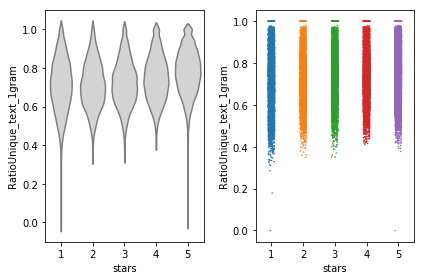

In [6]:
# stars vs 1gram
# violin plot
plt.subplot(1,2,1)
sns.violinplot(x='stars', y='RatioUnique_text_1gram', data=sub_df_train, inner=None, color='lightgray')

# strip plot
plt.subplot(1,2,2)
sns.stripplot(x='stars', y='RatioUnique_text_1gram', data=sub_df_train, jitter=True, size=1.5)

# Display the plot
plt.tight_layout()
plt.show()

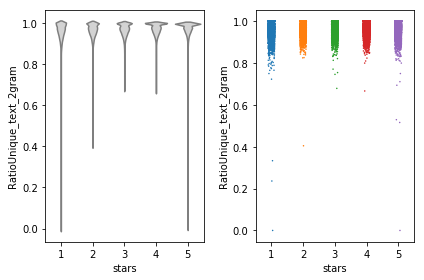

In [7]:
# stars vs 1gram
# violin plot
plt.subplot(1,2,1)
sns.violinplot(x='stars', y='RatioUnique_text_2gram', data=sub_df_train, inner=None, color='lightgray')

# strip plot
plt.subplot(1,2,2)
sns.stripplot(x='stars', y='RatioUnique_text_2gram', data=sub_df_train, jitter=True, size=1.5)

# Display the plot
plt.tight_layout()
plt.show()

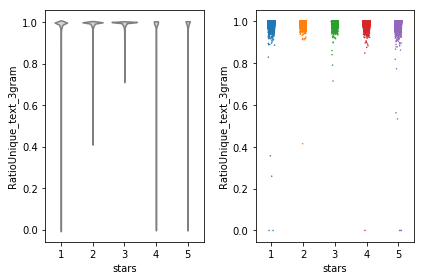

In [8]:
# stars vs 1gram
# violin plot
plt.subplot(1,2,1)
sns.violinplot(x='stars', y='RatioUnique_text_3gram', data=sub_df_train, inner=None, color='lightgray')

# strip plot
plt.subplot(1,2,2)
sns.stripplot(x='stars', y='RatioUnique_text_3gram', data=sub_df_train, jitter=True, size=1.5)

# Display the plot
plt.tight_layout()
plt.show()

In [15]:
# load bussiness.csv, subset and join
df_business = pd.read_csv('../../data/dataset/csv/business.csv', index_col = 'business_id')
sub_df_business = df_business[['state', 'stars', 'review_count']]
sub_df_business.rename(index=str, columns={"stars": "bstar_ave", "review_count": "breview_count"}, inplace=True)
#sub_df_business.head()
df_train_comb_business = pd.merge(df_train, sub_df_business, how='outer', left_on='business_id' , right_index=True)
df_train_comb_business.head()

,useful,date,text,stars,business_id,user_id,cool,funny,state,bstar_ave,breview_count
review_id,,,,,,,,,,,
v0i_UHJMo_hPBq9bxWvW4w,0,2016-05-28,"Love the staff, love the meat, love the place....",5,0W4lkclzZThpx3V65bVgig,bv2nCi5Qv5vroFiqKGopiw,0,0,QC,4.0,1953
FunI9om-aK5oMIIJmhMlZA,0,2011-09-28,a must stop when you are in montreal!\n\nI was...,4,0W4lkclzZThpx3V65bVgig,u0LXt3Uea_GidxRW1xcsfg,0,0,QC,4.0,1953
ufI413zxZqGwIBIInnM5Rg,4,2016-02-22,*Schwartz's has become a Montreal's famous lan...,4,0W4lkclzZThpx3V65bVgig,xYciRtVZ1PW4IxSX4oJ1aw,2,1,QC,4.0,1953
cDUhgPLuLR8hQDNgkGh_hw,0,2013-07-01,"Boss: ""You want to go to a conference in Mont...",4,0W4lkclzZThpx3V65bVgig,ayaxadJdy0ObFKaMlgfNVw,0,0,QC,4.0,1953
gE2sCFSGf8bhZ07uYRjpnw,0,2015-12-22,I went to Montreal a few weeks ago Schwartz wa...,4,0W4lkclzZThpx3V65bVgig,aU4ba7OlYKOKJ9kpvbOcsg,0,0,QC,4.0,1953


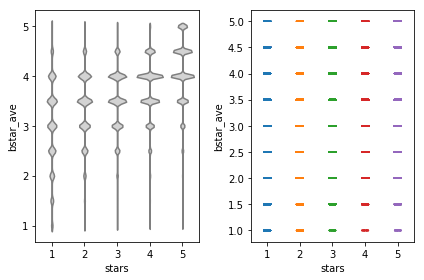

In [16]:
# stars vs business average star
# violin plot
plt.subplot(1,2,1)
sns.violinplot(x='stars', y='bstar_ave', data=df_train_comb_business, inner=None, color='lightgray')

# strip plot
plt.subplot(1,2,2)
sns.stripplot(x='stars', y='bstar_ave', data=df_train_comb_business, jitter=True, size=1.5)

# Display the plot
plt.tight_layout()
plt.show()

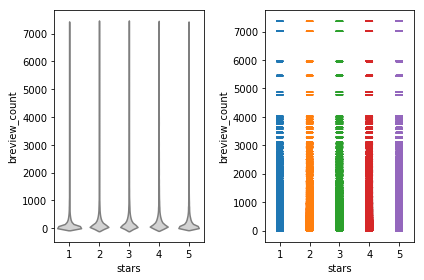

In [17]:
# stars vs bussiness review counts
# violin plot
plt.subplot(1,2,1)
sns.violinplot(x='stars', y='breview_count', data=df_train_comb_business, inner=None, color='lightgray')

# strip plot
plt.subplot(1,2,2)
sns.stripplot(x='stars', y='breview_count', data=df_train_comb_business, jitter=True, size=1.5)

# Display the plot
plt.tight_layout()
plt.show()

In [19]:
# load user.csv, subset and join
df_user = pd.read_csv('../../data/dataset/csv/user.csv', index_col = 'user_id')
sub_df_user = df_user[['fans', 'review_count', 'friends']]
sub_df_user.rename(index=str, columns={"review_count": "ureview_count"}, inplace=True)
sub_df_user['nfriends'] = list(sub_df_user.apply(lambda x: len(x['friends']), axis=1))
#sub_df_business.head()
df_train_comb_user = pd.merge(df_train, sub_df_user, how='outer', left_on='user_id' , right_index=True)
df_train_comb_user.head()

,useful,date,text,stars,business_id,user_id,cool,funny,fans,ureview_count,friends,nfriends
review_id,,,,,,,,,,,,
v0i_UHJMo_hPBq9bxWvW4w,0,2016-05-28,"Love the staff, love the meat, love the place....",5,0W4lkclzZThpx3V65bVgig,bv2nCi5Qv5vroFiqKGopiw,0,0,0,6,['4Zpn3ObC2zexkIhor4LJIQ'],26
vkVSCC7xljjrAI4UGfnKEQ,0,2016-05-28,Super simple place but amazing nonetheless. It...,5,AEx2SYEUJmTxVVB18LlCwA,bv2nCi5Qv5vroFiqKGopiw,0,0,0,6,['4Zpn3ObC2zexkIhor4LJIQ'],26
n6QzIUObkYshz4dz2QRJTw,0,2016-05-28,Small unassuming place that changes their menu...,5,VR6GpWIda3SfvPC-lg9H3w,bv2nCi5Qv5vroFiqKGopiw,0,0,0,6,['4Zpn3ObC2zexkIhor4LJIQ'],26
MV3CcKScW05u5LVfF6ok0g,0,2016-05-28,Lester's is located in a beautiful neighborhoo...,5,CKC0-MOWMqoeWf6s-szl8g,bv2nCi5Qv5vroFiqKGopiw,0,0,0,6,['4Zpn3ObC2zexkIhor4LJIQ'],26
IXvOzsEMYtiJI0CARmj77Q,0,2016-05-28,Love coming here. Yes the place always needs t...,4,ACFtxLv8pGrrxMm6EgjreA,bv2nCi5Qv5vroFiqKGopiw,0,0,0,6,['4Zpn3ObC2zexkIhor4LJIQ'],26


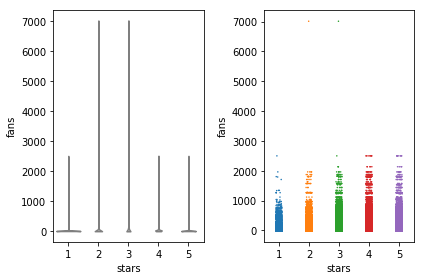

In [20]:
# stars vs user fans
# violin plot
plt.subplot(1,2,1)
sns.violinplot(x='stars', y='fans', data=df_train_comb_user, inner=None, color='lightgray')

# strip plot
plt.subplot(1,2,2)
sns.stripplot(x='stars', y='fans', data=df_train_comb_user, jitter=True, size=1.5)

# Display the plot
plt.tight_layout()
plt.show()

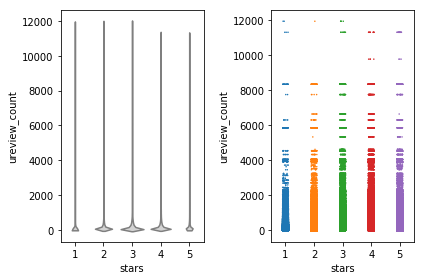

In [21]:
# stars vs user review counts
# violin plot
plt.subplot(1,2,1)
sns.violinplot(x='stars', y='ureview_count', data=df_train_comb_user, inner=None, color='lightgray')

# strip plot
plt.subplot(1,2,2)
sns.stripplot(x='stars', y='ureview_count', data=df_train_comb_user, jitter=True, size=1.5)

# Display the plot
plt.tight_layout()
plt.show()

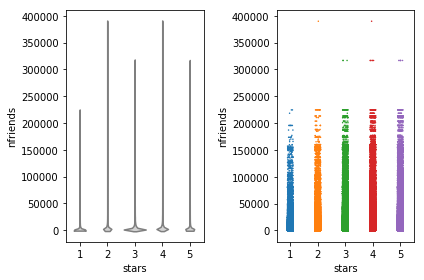

In [22]:
# stars vs user number of friends
# violin plot
plt.subplot(1,2,1)
sns.violinplot(x='stars', y='nfriends', data=df_train_comb_user, inner=None, color='lightgray')

# strip plot
plt.subplot(1,2,2)
sns.stripplot(x='stars', y='nfriends', data=df_train_comb_user, jitter=True, size=1.5)

# Display the plot
plt.tight_layout()
plt.show()